# ***Data Science Salaries 2024 Analysis***

---

## ***Introduction***

---

By [Darly Guntur Darris Purba](https://github.com/DarlyP)

![Data Science](DataScience.jpg)

Data : [Latest Data Science Job Salaries 2020 - 2024](https://www.kaggle.com/datasets/saurabhbadole/latest-data-science-job-salaries-2024)

---

## **Objektif**

--- 


Peningkatan pekerjaan di bidang data science terjadi seiring dengan meningkatnya kebutuhan akan analisis data. Beberapa faktor yang mempengaruhinya meliputi ledakan data, perkembangan data, kesadaran akan pentingnya data, pertumbuhan kecerdasan buatan dan analisis prediktif, serta penerapan data science di berbagai industri. Investasi dalam pelatihan dan pendidikan juga turut memperkuat tren ini. Dampak dari kebutuhan yang terus meningkat dan permintaan yang terus berkembang terhadap ilmu data science, menyebabkan pentingnya analisis pola tren gaji bagi individu yang tertarik memasuki dunia data.

---

### ***Identifikasi Masalah*** 



---

#### **Metode 5W + 1H**

---


Metode | Analisis
---|---
Who | Siapa yang menjadi sumber daya utama untuk memberikan wawasan dan pemahaman tentang tren gaji dalam dunia Data Science?
What | Apakah terdapat perbedaan dalam persepsi nilai antara profesional dengan tingkat pengalaman yang berbeda?
Where | Wilayah mana yang mempengaruhi tingkat gaji?
When | Kapan terjadi perubahan signifikan dalam tren data?
Why | 	Bagaimana perusahaan menggunakan wawasan dari data gaji ini dalam proses perekrutan karyawan?
How | 	Bagaimana penggunaan teknik analisis statistik membantu dalam memahami pola atau tren dalam data gaji?

---

## ***Import Libraries***

---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np
from math import pi
from scipy import stats
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, NumeralTickFormatter
from bokeh.transform import factor_cmap, cumsum
from collections import Counter
from bokeh.layouts import gridplot
from bokeh.palettes import Category20
from feature_engine.outliers import Winsorizer

---

## ***Data Loading*** 

---

### ***Analisis Tabel*** 

---

In [2]:
# Membuka Data CSV
pd.set_option('display.max_rows', None)
df = pd.read_csv('DataScience_salaries_2024.csv', na_values=['N/A', 'NA'])

In [3]:
# Menampilkan 5 Data Teratas
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [4]:
# Menampilkan 5 Data Terbawah
df.tail(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L
14837,2020,EN,PT,ML Engineer,14000,EUR,15966,DE,100,DE,S


In [5]:
# Menampilkan Data Pada Rentang Tertentu 
df.iloc[100:115]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
100,2024,SE,FT,Research Engineer,450000,USD,450000,US,0,US,M
101,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
102,2024,SE,FT,AI Architect,449000,USD,449000,US,0,US,M
103,2024,EX,FT,Head of Machine Learning,448000,USD,448000,US,100,US,M
104,2024,MI,FT,Research Engineer,440000,USD,440000,US,0,US,M
105,2024,MI,FT,Research Engineer,440000,USD,440000,US,0,US,M
106,2024,MI,FT,ML Engineer,440000,USD,440000,US,0,US,M
107,2024,MI,FT,Research Engineer,440000,USD,440000,US,0,US,M
108,2024,SE,FT,Research Scientist,440000,USD,440000,US,0,US,M
109,2024,MI,FT,Research Engineer,440000,USD,440000,US,0,US,M


In [6]:
# Menampilkan Kolom pada Data
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [7]:
# Menampilkan Jumlah Baris dan Kolom
df.shape

(14838, 11)

***Insight :***

Pada dataframe `DataScience_salaries_2024.csv` ditemukan ada 14838 baris dan 11 kolom. Penjelasan untuk setiap kolomnya adalah sebagai berikut:

Kolom | Penjelasan
--- | ---
`work_year` | Data tahun yang terkait dengan gaji pekerjaan.
`experience_level` | Tingkat pengalaman karyawan (pemula, menengah, senior)
`employment_type` | Jenis Pekerjaan (kontrak, paruh waktu, kontrak)
`job_title` | Jabatan atau peran karyawan terkait Data Science
`salary` | Gaji karyawan
`salary_currency` | Mata uang yang menunjukkan gaji
`salary_in_usd` | Konversi gaji ke USD (untuk standarisasi)
`employee_residence` | Lokasi tempat tinggal karyawan
`remote_ratio` | Rasio pekerjaan jarak jauh yang diperbolehkan 
`company_location` | Lokasi perusahaan
`company_size` | Ukuran perusahaan bedasarkan jumlah karyawan atau pendapatan

---

## ***Exploratory Data Analysis***

---

### **Analisis Deskripsi Kolom**

---

#### **Menampilkan Negara Pekerja**

---

In [8]:
# Menampilkan Nilai Unik untuk employee residence 
df["employee_residence"].unique().tolist()

['CL',
 'HU',
 'JP',
 'IN',
 'IL',
 'NO',
 'TH',
 'PH',
 'CA',
 'MX',
 'US',
 'ZA',
 'HK',
 'TR',
 'GB',
 'QA',
 'AU',
 'FR',
 'DK',
 'CH',
 'DE',
 'ES',
 'EG',
 'UA',
 'RU',
 'PL',
 'NZ',
 'BE',
 'NG',
 'PR',
 'MY',
 'BR',
 'SA',
 'IE',
 'SG',
 'TN',
 'PT',
 'NL',
 'CO',
 'SE',
 'IT',
 'CN',
 'BA',
 'AE',
 'MD',
 'LT',
 'DO',
 'UZ',
 'MU',
 'FI',
 'IR',
 'DZ',
 'IQ',
 'JE',
 'AR',
 'HR',
 'SI',
 'LB',
 'AT',
 'VN',
 'KE',
 'GR',
 'BG',
 'MT',
 'LV',
 'BO',
 'CZ',
 'RO',
 'CY',
 'GE',
 'GH',
 'KR',
 'EE',
 'PK',
 'KW',
 'AM',
 'LU',
 'AD',
 'OM',
 'AS',
 'CF',
 'UG',
 'PE',
 'RS',
 'CR',
 'HN',
 'EC',
 'ID']

In [9]:
# Menampilkan Nilai Unik untuk company location
df["company_location"].unique().tolist()

['CL',
 'US',
 'HU',
 'JP',
 'IN',
 'ID',
 'DE',
 'CH',
 'IL',
 'SG',
 'AS',
 'NO',
 'TH',
 'PH',
 'CA',
 'MX',
 'ZA',
 'HK',
 'TR',
 'GB',
 'QA',
 'AU',
 'DK',
 'ES',
 'FR',
 'EG',
 'UA',
 'RU',
 'PL',
 'NZ',
 'NG',
 'PR',
 'BR',
 'SA',
 'IE',
 'NL',
 'CO',
 'SE',
 'BA',
 'AE',
 'LT',
 'PT',
 'MU',
 'CZ',
 'FI',
 'IR',
 'DZ',
 'IQ',
 'CN',
 'AR',
 'HR',
 'SI',
 'LB',
 'AT',
 'VN',
 'KE',
 'GR',
 'BE',
 'MT',
 'LV',
 'IT',
 'GI',
 'RO',
 'EE',
 'LU',
 'KR',
 'AM',
 'AD',
 'OM',
 'BS',
 'CF',
 'PK',
 'MY',
 'GH',
 'HN',
 'MD',
 'EC']

***Insight* :**

Dari tabel `employee_residence` dan `company_location` diketahui terdapat banyak kode negara yang menjadi objek dari data ini. Adapun rincian kode ini akan ditampilkan pada tabel berikut:

| Kode Negara | Nama Negara               |
|-------------|---------------------------|
| CL          | Chile                     |
| HU          | Hungaria                  |
| JP          | Jepang                    |
| IN          | India                     |
| IL          | Israel                    |
| NO          | Norwegia                  |
| TH          | Thailand                  |
| PH          | Filipina                  |
| CA          | Kanada                    |
| MX          | Meksiko                   |
| US          | Amerika Serikat           |
| ZA          | Afrika Selatan            |
| HK          | Hong Kong                 |
| TR          | Turki                     |
| GB          | Britania Raya             |
| QA          | Qatar                     |
| AU          | Australia                 |
| FR          | Prancis                   |
| DK          | Denmark                   |
| CH          | Swiss                     |
| DE          | Jerman                    |
| ES          | Spanyol                   |
| EG          | Mesir                     |
| UA          | Ukraina                   |
| RU          | Rusia                     |
| PL          | Polandia                  |
| NZ          | Selandia Baru             |
| NG          | Nigeria                   |
| PR          | Puerto Riko               |
| BR          | Brasil                    |
| SA          | Arab Saudi                |
| IE          | Irlandia                  |
| NL          | Belanda                   |
| CO          | Kolombia                  |
| SE          | Swedia                    |
| BA          | Bosnia dan Herzegovina    |
| AE          | Uni Emirat Arab           |
| LT          | Lituania                  |
| PT          | Portugal                  |
| MU          | Mauritius                 |
| CZ          | Republik Ceko             |
| FI          | Finlandia                 |
| IR          | Iran                      |
| DZ          | Aljazair                  |
| IQ          | Irak                      |
| CN          | Tiongkok                  |
| AR          | Argentina                 |
| HR          | Kroasia                   |
| SI          | Slovenia                  |
| LB          | Lebanon                   |
| AT          | Austria                   |
| VN          | Vietnam                   |
| KE          | Kenya                     |
| GR          | Yunani                    |
| BE          | Belgia                    |
| MT          | Malta                     |
| LV          | Latvia                    |
| IT          | Italia                    |
| RO          | Rumania                   |
| EE          | Estonia                   |
| LU          | Luksemburg                |
| KR          | Korea Selatan             |
| AM          | Armenia                   |
| AD          | Andorra                   |
| OM          | Oman                      |
| CF          | Republik Afrika Tengah    |
| PK          | Pakistan                  |
| MY          | Malaysia                  |
| GH          | Ghana                     |
| HN          | Honduras                  |
| MD          | Moldova                   |
| EC          | Ekuador                   |
| ID          | Indonesia                 |
| GI          | Gibraltar                 |
| BS          | Bahamas                   |

---


#### **Menampilkan Pengalaman Pekerja**

---

In [10]:
# Menampilkan Nilai Unik untuk experience level
df["experience_level"].unique().tolist()

['MI', 'SE', 'EN', 'EX']

***Insight :***

Dari tabel `experience_level` diketahui terdapat level pengalaman yang menjadi objek dari data ini. Adapun rincian akan ditampilkan pada tabel berikut:

Level Pengalaman | Keterangan
--- | ---
MI | Mid Level
SE | Senior Level
EN | Entry Level
EX | Expert Level

---

#### **Menampilkan Status Pekerjaan Pekerja**

---

In [11]:
# Menampilkan Nilai Unik untuk employment type
df["employment_type"].unique().tolist()

['FT', 'FL', 'CT', 'PT']

***Insight :***


Dari tabel `employment_type` diketahui terdapat jenis pekerjaan yang menjadi objek dari data ini. Adapun rincian akan ditampilkan pada tabel berikut:

Jenis Pekerjaan | Keterangan
--- | ---
FT | Full Time
FL | Freelance
CT | Contract
PT | Part Time

---

#### **Menampilkan Jabatan Pekerjaan Pekerja**

---

In [12]:
# Menampilkan Nilai Unik untuk job title
df["job_title"].unique().tolist()

['Data Scientist',
 'BI Data Analyst',
 'ML Engineer',
 'Lead Machine Learning Engineer',
 'Data Science Manager',
 'Head of Machine Learning',
 'Research Engineer',
 'Head of Data Science',
 'AI Programmer',
 'Machine Learning Engineer',
 'Lead Data Scientist',
 'Data Engineer',
 'Applied Machine Learning Scientist',
 'Lead Data Analyst',
 'Data Analytics Manager',
 'Data Integration Specialist',
 'Principal Data Architect',
 'NLP Engineer',
 'Big Data Engineer',
 'AI Research Engineer',
 'Machine Learning Software Engineer',
 'Data Analyst',
 'Applied Data Scientist',
 'AI Scientist',
 'Data Analytics Lead',
 'Business Data Analyst',
 'Product Data Analyst',
 'Computer Vision Engineer',
 'Data Science Consultant',
 'AI Architect',
 'Analytics Engineer',
 'Machine Learning Scientist',
 'Research Scientist',
 'Prompt Engineer',
 'Principal Data Scientist',
 'Applied Scientist',
 'Deep Learning Engineer',
 'Data Architect',
 'AI Engineer',
 'Data Infrastructure Engineer',
 'Data Science

In [13]:
# Menampilkan Panjang Nilai Unik untuk job title
len(df["job_title"].unique())

153

***Insight :***

Dari tabel `job_title` diketahui judul pekerjaan yang menjadi objek data ini. Terdapat 153 entri unik mulai dari `Data Science` hingga `Insight Analyst`.

---

#### **Menampilkan Ukuran Perusahaan Pekerja1**

---

In [14]:
# Menampilkan Panjang Nilai Unik untuk company size
df["company_size"].unique()

array(['L', 'S', 'M'], dtype=object)

***Insight :***

Informasi tentang ukuran perusahaan dapat diperoleh dari kolom `company_size` dalam tabel ini. Kolom ini membagi ukuran perusahaan menjadi tiga kategori berdasarkan jumlah karyawan atau pendapatan perusahaan.

Kode | Keterangan
--- | ---
S | Small
M | Medium
L | Large

---

#### **Menampilkan Rasio Kerja Jarak Jauh Pekerja**

---

In [15]:
# Menampilkan Panjang Nilai Unik untuk remote ratio
df["remote_ratio"].unique()

array([100,  50,   0], dtype=int64)

***Insight :***

Dari tabel `remote ratio` diketahui persentase kemungkinan untuk bekerja secara remote atau WFH. Kolom ini dibagi menjadi tiga tipe.

Kode | Keterangan
--- | ---
100 | Bekerja secara *remote*
50 | Bekerja setengah *remote* setengah kantor
0 | Bekerja di kantor

---

#### **Menampilkan *Employee Residence & Company Location* di Indonesia**

---

In [16]:
# Menampilkan lokasi Tempat Tinggal Karyawan yang Berada di Indonesia
df[df["employee_residence"].isin(["ID"])]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L


In [17]:
# Menampilkan Lokasi Perusahaan yang Berada di Indonesia
df[df["company_location"].isin(["ID"])]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
15,2022,MI,FT,Data Scientist,4200000,INR,53416,IN,100,ID,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L


***Insight :***

Ketersediaan data mengenai lokasi perusahaan maupun tempat tinggal karyawan di Indonesia masih terbatas. Oleh karena itu, menjelaskan data yang lebih spesifik mengenai pekerja *Data Science* dan kaitannya dengan gaji di Indonesia cukup sulit. Sebagai gantinya, akan dilakukan pendekatan yang lebih umum.

---

### **Visualisasi Data**

---

#### **Fungsi Grafik Visualiasi**

---

In [18]:
# Fungsi EDA Untuk Barplot 1 Kolom
def plot_bar(df, x_column, title="Contoh Bar Plot"):
		# Aktifkan output_notebook
    output_notebook()
    
    # Menghitung jumlah nilai unik pada kolom 'x_column'
    category_counts = Counter(df[x_column])
    categories = list(category_counts.keys())
    
    # Membuat sumber data
    source = ColumnDataSource(data=dict(x=categories, y=list(category_counts.values())))

    # Generate random colors
    random.seed(42)  # Memberikan seed agar warna acak konsisten
    colors = ["#%06x" % random.randint(0, 0xFFFFFF) for i in range(len(categories))]

    # Membuat plot
    p = figure(x_range=categories, title=title,
               toolbar_location="below", tools="pan,box_zoom,wheel_zoom,reset,save")

    # Menambahkan bar plot dengan warna yang dihasilkan secara acak
    p.vbar(x='x', top='y', width=0.9, source=source, 
           line_color='white', fill_color=factor_cmap('x', palette=colors, factors=categories), 
           legend_field="x")

    # Menambahkan hover tool
    hover = HoverTool()
    hover.tooltips = [("Kategori", "@x"), ("Jumlah", "@y{0,0}")]
    p.add_tools(hover)

    p.xaxis.axis_label = title
    p.yaxis.axis_label = 'Count'
    p.xaxis.major_label_orientation = 1

    # Mengatur tulisan axis-x dan axis-y menjadi tebal (bold)
    p.xaxis.axis_label_text_font_style = "bold"
    p.yaxis.axis_label_text_font_style = "bold"

    # Mengatur ketebalan garis axis
    p.xaxis.axis_line_width = 1.1
    p.yaxis.axis_line_width = 1.1

    # Mengatur label axis menjadi tebal
    p.xaxis.major_label_text_font_style = "bold"
    p.yaxis.major_label_text_font_style = "bold"

    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.y_range.end = max(category_counts.values()) + 0.2 * max(category_counts.values())

    # Mengatur judul plot
    p.title.text_font_size = '16pt'  # Ubah ukuran font judul
    p.title.text_font_style = 'bold'  # Ubah gaya font judul menjadi tebal
    p.title.align = "center"

    # Mengatur posisi legenda di luar plot
    p.legend.orientation = "vertical"
    p.legend.location = "top_right"
    p.legend.spacing = 10  # Menambahkan ruang antara legenda dan plot

    show(p)


In [19]:
# Fungsi EDA Untuk IQR plot & Histogram 1 Kolom
def histogram_boxplot(df, nama_kolom, judul="Contoh Bar Plot"):
    # Mengaktifkan output di notebook
    output_notebook()

    # Ekstrak data kolom
    data_kolom = df[nama_kolom]

    # Plot histogram
    hist, edges = np.histogram(data_kolom, bins=20)

    # Generate random colors for the bars
    colors = random.choices(Category20[20], k=len(hist))

    p1 = figure(title=f"{judul} (Histogram)", tools="save,hover", background_fill_color="#fafafa",
                width=600, height=400, tooltips=[("Jumlah", "@top"), ("Interval", "@left{0.00} hingga @right{0.00}")],
                x_axis_label=judul, y_axis_label="Frequency")

    # Konversi edges ke string untuk faktor
    edges_str = [f"{edges[i]:.2f} hingga {edges[i+1]:.2f}" for i in range(len(edges)-1)]

    p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], 
            fill_color=colors, line_color="white", alpha=0.7)

    # Box plot
    q1 = data_kolom.quantile(0.25)
    q2 = data_kolom.quantile(0.50)
    q3 = data_kolom.quantile(0.75)
    iqr = q3 - q1

    lower_whisker = data_kolom[data_kolom >= (q1 - 1.5 * iqr)].min()
    upper_whisker = data_kolom[data_kolom <= (q3 + 1.5 * iqr)].max()

    outliers = data_kolom[(data_kolom > upper_whisker) | (data_kolom < lower_whisker)]

    p2 = figure(title=f"{judul} (Boxplot)", tools="save,hover", background_fill_color="#fafafa",
                width=400, height=400, tooltips=[("Nilai", "@y"), ("Q1", f"{q1:.2f}"), 
                                                 ("Q2 (Median)", f"{q2:.2f}"), ("Q3", f"{q3:.2f}"), 
                                                 ("Lower Whisker", f"{lower_whisker:.2f}"), 
                                                 ("Upper Whisker", f"{upper_whisker:.2f}")])

    # Menambahkan elemen diagram kotak
    p2.segment(1, lower_whisker, 1, q1, line_color="black")
    p2.segment(1, q3, 1, upper_whisker, line_color="black")
    p2.vbar(1, 0.7, q1, q3, fill_color="navy", line_color="black")
    p2.vbar(1, 0.7, q2, q2, line_color="black")

    # Whiskers
    p2.rect(1, lower_whisker, 0.2, 0.01, line_color="black")
    p2.rect(1, upper_whisker, 0.2, 0.01, line_color="black")

    # Outliers
    p2.scatter([1]*len(outliers), outliers, size=6, color="red", fill_alpha=0.6)

    # Menghapus label sumbu dan tanda sumbu pada boxplot
    p2.xaxis.axis_label = ""
    p2.yaxis.axis_label = ""
    p2.xaxis.visible = False
    p2.yaxis.visible = False

    # Set gaya label sumbu dan tanda sumbu
    p1.xaxis.axis_label_text_font_style = "bold"
    p1.xaxis.axis_label_text_font_size = "10pt"
    p1.xaxis.major_label_text_font_style = "bold"
    p1.xaxis.major_label_text_font_size = "8pt"
    p1.yaxis.axis_label_text_font_style = "bold"
    p1.yaxis.axis_label_text_font_size = "10pt"
    p1.yaxis.major_label_text_font_style = "bold"
    p1.yaxis.major_label_text_font_size = "8pt"

    # Menghapus garis grid
    p1.grid.grid_line_color = None
    p2.grid.grid_line_color = None

    # Mengatur formatter sumbu agar tidak menggunakan notasi ilmiah
    p1.yaxis.formatter.use_scientific = False
    p1.xaxis.formatter.use_scientific = False

    # Menata plot dalam grid
    grid = gridplot([[p1, p2]])

    # Menampilkan plot
    show(grid)

# Contoh penggunaan:
# Diasumsikan df adalah DataFrame dan sudah dimuat
# df = pd.read_csv('file.csv')  # Gantilah ini dengan cara yang sesuai untuk memuat DataFrame Anda
# histogram_boxplot(df, 'salary_in_usd', "Salary in USD")


In [20]:
# Fungsi EDA Scatterplot dengan Regresi
def scatter_plot_regression(df, x_col='Year', y_col='Salary', x_label='Tahun', y_label='Gaji Rata-rata', title='Diagram Sebaran dengan Garis Regresi'):
    # Konversi data menjadi array numpy
    x_data = df[x_col].values
    y_data = df[y_col].values
    
    # Hitung garis regresi
    m, b = np.polyfit(x_data, y_data, 1)
    regression_line = m * x_data + b
    
    # Buat ColumnDataSource
    source = ColumnDataSource(data={x_col: x_data, y_col: y_data, 'regression_line': regression_line})
    
    # Buat plot baru dengan judul dan label sumbu
    p = figure(title=title, x_axis_label=x_label, y_axis_label=y_label, width=800, height=400,
               tools="pan,box_zoom,wheel_zoom,reset,save")
    
    # Tambahkan diagram sebaran
    p.scatter(x_col, y_col, source=source, size=10, color="navy", alpha=0.5, legend_label=y_label)
    
    # Tambahkan garis regresi
    p.line(x_col, 'regression_line', source=source, line_width=2, line_color="red", legend_label="Garis Regresi")
    
    # Tambahkan alat hover untuk menampilkan nilai data
    hover = HoverTool()
    hover.tooltips = [(x_label, f"@{x_col}"), (y_label, f"@{y_col}")]
    p.add_tools(hover)
    
    # Sesuaikan gaya label sumbu
    p.xaxis.axis_label_text_font_style = "bold"
    p.yaxis.axis_label_text_font_style = "bold"
    
    # Atur format untuk sumbu Y agar menampilkan nilai tanpa notasi ilmiah
    p.yaxis.formatter = NumeralTickFormatter(format="0")
    
    # Sesuaikan plot
    p.legend.location = "top_left"
    p.legend.click_policy = "hide"
    
    # Tampilkan plot langsung di notebook
    show(p)
    output_notebook()  # Untuk menampilkan plot di dalam notebook


# # Data contoh
# data = {
#     'Year': [2021, 2021, 2021, 2022, 2022, 2023, 2023, 2024, 2024, 2024],
#     'Salary': [50000, 55000, 60000, 65000, 70000, 72000, 75000, 78000, 80000, 85000]
# }

# # Buat DataFrame
# df = pd.DataFrame(data)

# # Menghitung rata-rata gaji untuk setiap tahun
# avg_salaries = df.groupby('Year')['Salary'].mean().reset_index()

# # Panggil fungsi dengan data rata-rata gaji per tahun
# scatter_plot_with_regression(avg_salaries, x_col='Year', y_col='Salary', x_label='Tahun', y_label='Gaji Rata-rata', title='Perubahan Gaji Rata-rata dari Tahun 2021 hingga 2024')

In [21]:
# Fungsi EDA Untuk Barplot 2 Kolom
def plot_bar_2_column(df, x_column, y_column, title="Contoh Bar Plot", x_label="X-axis", y_label="Y-axis"):
    # Aktifkan output_notebook
    output_notebook()
    
    # Membuat sumber data
    source = ColumnDataSource(data=dict(
        x=df[x_column].astype(str),  # Convert categories to strings
        y=df[y_column]
    ))

    # Generate random colors
    random.seed(42)  # Memberikan seed agar warna acak konsisten
    colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(df))]

    # Membuat plot
    p = figure(x_range=df[x_column].astype(str), title=title,
               toolbar_location="below", tools="pan,box_zoom,wheel_zoom,reset,save")

    # Menambahkan bar plot dengan warna yang dihasilkan secara acak
    p.vbar(x='x', top='y', width=0.9, source=source, 
           line_color='white', fill_color=factor_cmap('x', palette=colors, factors=df[x_column].astype(str)), 
           legend_field="x")

    # Menambahkan hover tool dengan formatter untuk menghindari notasi ilmiah
    hover = HoverTool()
    hover.tooltips = [("Kategori", "@x"), ("Jumlah", "@y{0,0}")]
    p.add_tools(hover)

    p.xaxis.axis_label = x_label
    p.yaxis.axis_label = y_label
    p.xaxis.major_label_orientation = 1

    # Mengatur tulisan axis-x dan axis-y menjadi tebal (bold)
    p.xaxis.axis_label_text_font_style = "bold"
    p.yaxis.axis_label_text_font_style = "bold"

    # Mengatur ketebalan garis axis
    p.xaxis.axis_line_width = 1.1
    p.yaxis.axis_line_width = 1.1

    # Mengatur label axis menjadi tebal
    p.xaxis.major_label_text_font_style = "bold"
    p.yaxis.major_label_text_font_style = "bold"

    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.y_range.end = max(df[y_column]) + 0.2 * max(df[y_column])  # Mengatur kisaran sumbu y

    # Mengatur format angka pada sumbu y
    p.yaxis.formatter = NumeralTickFormatter(format="0,0")

    # Mengatur judul plot
    p.title.text_font_size = '12pt'  # Ubah ukuran font judul
    p.title.text_font_style = 'bold'  # Ubah gaya font judul menjadi tebal
    p.title.align = "center"

    # Mengatur posisi legenda di tengah atas
    p.legend.orientation = "horizontal"
    p.legend.location = "top_center"
    p.legend.spacing = 10  # Menambahkan ruang antara legenda dan plot

    show(p)

In [22]:
# Fungsi EDA Untuk Piechart
def pie_chart(data, title="Interactive Pie Chart"):
    categories = data.index
    values = data.values

    # Membuat data frame dari data yang diberikan
    df = pd.DataFrame({'category': categories, 'value': values})

    # Menghitung persentase untuk setiap kategori
    df['percentage'] = (df['value'] / df['value'].sum()) * 100

    # Menghitung sudut untuk setiap kategori
    df['angle'] = df['value'] / df['value'].sum() * 2 * pi

    # Membuat warna secara acak untuk setiap kategori
    colors = [f"#{random.randint(0, 0xFFFFFF):06x}" for _ in range(len(df))]
    df['color'] = colors

    # Buat figure untuk diagram pie
    p = figure(width=800, height=500, title=title, toolbar_location=None,
               tools="hover", tooltips="@category: @percentage{0.0}%, @value", x_range=(-0.5, 1.0))

    # Tambahkan wedge (irisan) ke figure
    p.wedge(x=0, y=1, radius=0.4,
            start_angle=cumsum('angle', include_zero=True),
            end_angle=cumsum('angle'),
            line_color="white", fill_color='color', legend_field='category', source=df)

    # Tambahkan HoverTool untuk menampilkan informasi tambahan
    hover = p.select(dict(type=HoverTool))
    hover.tooltips = [("Category", "@category"), ("Percentage", "@percentage{0.0}%"), ("Value", "@value")]

    # Gaya dan pengaturan figure
    p.axis.axis_label = None
    p.axis.visible = False
    p.grid.grid_line_color = None
    p.title.align = 'center'
    p.title.text_font_size = '15pt'
    p.legend.title = 'Legend'
    p.legend.label_text_font_size = '10pt'

    # Tampilkan plot
    show(p)
    output_notebook()

***Insight :***

Sebelum melangkah ke tahap *Exploratory Data Analysis*, dilakukan penyusunan fungsi-fungsi penting untuk mencakup berbagai jenis visualisasi. Fungsi-fungsi tersebut meliputi *Barplot*, *Histogram*, *Boxplot*, *Pie*, dan *Scatterplot*, yang semuanya akan diterapkan menggunakan library Bokeh. Dengan menyusun fungsi-fungsi ini, kita dapat dengan mudah menerapkan visualisasi yang sesuai untuk menganalisis dan memahami data dengan lebih mendalam.

---

#### **Visualisasi Pengalaman Kerja**

---

In [23]:
# Menampilkan Kolom Bar
plot_bar(df, x_column="experience_level", title="Pengalaman Kerja")

Loading BokehJS ...

***Insight :***

Dari plot *Experience Level*, terlihat bahwa kategori *Senior Level* memiliki jumlah data yang lebih tinggi dibandingkan dengan kategori lainnya, diikuti oleh *Mid Level*, *Entry Level*, dan *Expert Level*. Fenomena ini mungkin terjadi karena beberapa alasan yang mendasari dinamika industri Data Science. Kategori *Senior Level* mungkin memiliki jumlah data yang lebih tinggi karena:

- Pertumbuhan Industri: Seiring dengan perkembangan industri *Data Science*, permintaan akan profesional berpengalaman yang dapat mengelola proyek-proyek yang kompleks dan memberikan wawasan strategis mungkin meningkat. Ini dapat menghasilkan lebih banyak posisi senior yang tersedia.

- Tingkat Pengalaman yang Dibutuhkan: Banyak posisi tingkat senior dalam *Data Science* memerlukan beberapa tahun pengalaman kerja yang relevan. Orang yang telah bekerja dalam industri ini untuk jangka waktu yang lama mungkin cenderung berada dalam kategori *Senior Level*.

- Rotasi Pekerjaan: Profesional yang telah bekerja dalam bidang *Data Science* untuk jangka waktu tertentu mungkin telah naik ke tingkat senior melalui promosi internal atau pindah dari perusahaan lain dengan posisi yang lebih tinggi.

- Ketersediaan Data: Banyak platform atau sumber data mungkin lebih banyak menyediakan informasi tentang posisi tingkat senior dalam Data Science karena kebutuhan akan analisis yang lebih mendalam dan kompleks.

---

#### **Visualisasi Status Pekerjaan Pekerja**

---

In [24]:
# Menampilkan Kolom Bar
plot_bar(df, x_column="employment_type", title="Status Pekerjaan")

Loading BokehJS ...

In [25]:
df.employment_type.value_counts()

employment_type
FT    14772
PT       27
CT       26
FL       13
Name: count, dtype: int64

***Insight :***

Status pekerjaan untuk pekerjaan di bidang data science didominasi oleh posisi Full Time dibandingkan dengan yang lainnya. Data menunjukkan bahwa hampir mencapai nilai 14772. Di sisi lain, Freelance, Contract, dan Part Time memiliki jumlah data yang sangat rendah, hanya sekitar 20-an. Fenomena ini mungkin mencerminkan struktur kerja umum dalam industri *Data Science* serta preferensi atau kebutuhan umum dari perusahaan dan profesional di bidang ini. Berikut beberapa penjelasan yang mungkin terkait dengan dominasi status pekerjaan *Full Time*:

- Kebutuhan Konsistensi: Banyak proyek di bidang *Data Science* memerlukan keterlibatan yang konsisten dan intensif. Oleh karena itu, perusahaan cenderung mencari karyawan dengan status *Full Time* yang dapat berkomitmen sepenuhnya terhadap proyek-proyek tersebut.

- Kemajuan Karir: Banyak profesional *Data Science* mungkin melihat posisi *Full Time sebagai langkah penting dalam kemajuan karir mereka. Posisi ini sering kali menawarkan jaminan keamanan kerja, manfaat tambahan, dan peluang untuk pertumbuhan karir yang lebih terstruktur.

- Stabilitas Keuangan: Bagi banyak individu, pekerjaan *Full Time* menawarkan stabilitas finansial yang lebih besar daripada posisi kontrak atau paruh waktu. Hal ini dapat lebih menarik bagi profesional yang memiliki tanggungan finansial yang signifikan.

- Kultur Perusahaan: Beberapa perusahaan mungkin memiliki preferensi terhadap karyawan *Full Time* karena konsistensi dan kontinuitas yang mereka bawa ke tim. Ini mungkin lebih sesuai dengan budaya kerja dan nilai-nilai perusahaan tersebut.

Sementara itu, jumlah data yang sangat rendah untuk status pekerjaan lain seperti *Freelance*, *Contract*, dan *Part Time* mungkin mencerminkan fokus utama industri *Data Science* pada penggunaan karyawan penuh waktu untuk proyek-proyeknya. Namun, peran-peran non-tradisional seperti kontrak atau freelance juga dapat menjadi pilihan menarik terutama untuk proyek-proyek yang bersifat jangka pendek atau spesifik.


---

#### **Visualisasi Ukuran Perusahaan Pekerja**

---

In [26]:
# Menampilkan Kolom Bar
plot_bar(df, x_column="company_size", title="Company Size")

Loading BokehJS ...

***Insight :***

Ukuran perusahaan didominasi oleh kategori Medium dibandingkan dengan Large dan Small. Namun, terdapat ketimpangan data dimana jumlah perusahaan dalam kategori Medium mencapai 13674, sedangkan jumlah perusahaan dalam kategori lain hanya mencapai ratusan. Fenomena ini mungkin mencerminkan sejumlah faktor yang memengaruhi struktur industri Data Science dan preferensi perusahaan serta profesional di dalamnya:

- Kebutuhan Kapasitas Tengah: Banyak proyek di industri *Data Science* membutuhkan tim yang memiliki kapasitas sedang untuk menangani volume data yang cukup besar namun tidak sebesar perusahaan besar. Perusahaan *Medium* mungkin dianggap memiliki keseimbangan yang baik antara sumber daya dan fleksibilitas untuk menangani proyek-proyek tersebut.

- Kemajuan Teknologi: Perusahaan Medium seringkali sudah berkembang melewati tahap awal startup dan telah membangun infrastruktur dan tim yang cukup untuk menjalankan operasinya. Mereka mungkin mencari solusi dan inovasi di bidang *Data Science* untuk mengoptimalkan operasional mereka.

- Fokus pada Pertumbuhan Menengah: Perusahaan Medium mungkin lebih condong pada pertumbuhan yang stabil dan terukur dibandingkan dengan perusahaan besar yang mungkin lebih berfokus pada ekspansi global atau diversifikasi. Oleh karena itu, mereka mungkin lebih berorientasi pada perekrutan talenta di bidang *Data Science* untuk memperkuat inti operasional mereka.

- Keterbatasan Sumber Daya: Perusahaan *Small* mungkin memiliki keterbatasan sumber daya, termasuk sumber daya manusia dan keuangan, sehingga mereka mungkin tidak sekuat perusahaan *Medium* dalam mengembangkan tim *Data Science* mereka. Di sisi lain, perusahaan Large mungkin cenderung memiliki infrastruktur dan tim internal yang mapan sehingga mereka mungkin tidak terlalu banyak merekrut dari luar.

---

#### **Visualisasi Jenis Pekerjaan di Bidang Data**

---

In [27]:
# Menampilkan 10 Jenis Pekerjaan di Bidang Data Science
job_title = df['job_title'].value_counts()
top_10 = 10
top_10_jobs_title = job_title.head(top_10)
top_10_jobs_title

job_title
Data Engineer                     3162
Data Scientist                    3015
Data Analyst                      2189
Machine Learning Engineer         1542
Research Scientist                 475
Analytics Engineer                 403
Applied Scientist                  383
Data Architect                     369
Research Engineer                  276
Business Intelligence Engineer     230
Name: count, dtype: int64

In [28]:
# Menghitung Nilai Jenis Pekerjaan lain
other_job_title = job_title.sum() - top_10_jobs_title.sum()
print(f'Total 10 Jenis Pekerjaan di Bidang Data : {top_10_jobs_title.sum()}')
print(f'Total Keseluruhan Pekerjaan di Bidang Data : {job_title.sum()}')
print(f'Total jenis pekerjaan lain adalah : {other_job_title}')

Total 10 Jenis Pekerjaan di Bidang Data : 12044
Total Keseluruhan Pekerjaan di Bidang Data : 14838
Total jenis pekerjaan lain adalah : 2794


In [29]:
# Menampilkan Visualisasi Pie Chart
pie_chart(top_10_jobs_title, title="Top 10 Jenis Pekerjaan di Bidang Data")


Loading BokehJS ...

***Insight :***

Bagian ini akan membahas jenis pekerjaan yang paling banyak dicari di bidang data. Ada empat jenis pekerjaan yang memiliki nilai tertinggi, yaitu `Data Engineer`, `Data Scientist`, `Data Analyst`, dan `Machine Learning Engineer` Berdasarkan diagram, nilai yang dimiliki oleh keempat jenis pekerjaan ini mencapai hingga 20% dari total data. Informasi ini dapat menjadi pertimbangan bagi individu yang tertarik untuk terlibat dalam industri data. Fenomena ini menunjukkan tren yang signifikan dalam permintaan tenaga kerja di industri *Data Science*. Berikut adalah beberapa penjelasan yang mungkin terkait dengan dominasi jenis pekerjaan tertentu:

- Pentingnya Peran Tertentu: Pekerjaan seperti `Data Engineer`, `Data Scientist`, `Data Analyst`, dan `Machine Learning Engineer` merupakan peran kunci dalam siklus kerja `Data Science`. Mereka memiliki tanggung jawab yang berbeda namun saling terkait dalam mengelola, menganalisis, dan memanfaatkan data untuk mendukung pengambilan keputusan bisnis.

- Tingkat Keterampilan yang Dibutuhkan: Keempat jenis pekerjaan ini mungkin membutuhkan tingkat keterampilan dan pengetahuan yang tinggi dalam bidang seperti pemrograman, statistik, dan pemahaman domain bisnis. Oleh karena itu, permintaan untuk posisi-posisi ini cenderung tinggi karena sumber daya manusia yang memiliki kualifikasi yang sesuai mungkin lebih langka.

- Pertumbuhan Industri: Industri `Data Science` terus berkembang pesat, baik dalam skala perusahaan besar maupun startup. Permintaan untuk jenis pekerjaan yang terkait dengan pengelolaan dan analisis data semakin meningkat seiring dengan peran data yang semakin krusial dalam pengambilan keputusan bisnis.

- Inovasi Teknologi: Peran seperti `Machine Learning Engineer` mungkin semakin dicari karena perkembangan teknologi baru seperti kecerdasan buatan dan analisis prediktif semakin banyak diterapkan dalam berbagai industri. Perusahaan mencari profesional yang dapat mengembangkan dan menerapkan solusi-solusi inovatif ini.

---

## ***Data Cleaning***

---

### **Menampilkan Nilai *Missing Value***

---

In [30]:
# Menampilkan informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [31]:
# Menampilkan Nilai Missing Value
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

***Insight :***

`DataScience_salaries_2024.csv` dapat dianggap sebagai data yang berkualitas baik. Hal ini disebabkan oleh tidak adanya nilai yang hilang (*missing value*) dari total 14838 data yang tersedia. Ini menunjukkan bahwa proses pengambilan data dilakukan dengan sangat baik. Selain itu, tidak ada nilai dalam kolom yang menyimpan spasi berlebihan atau nilai yang memiliki anomali.

---

### **Menampilkan Nilai Duplikasi**

---

In [32]:
# Menampilkan Nilai Duplikasi
df.duplicated().sum()

5711

In [33]:
# Melakukan Permeriksaan Terhadap Data Duplikasi
duplicated_data = df.duplicated(keep=False)
duplicate_rows = df[duplicated_data]

# Menampilkan Data
duplicate_rows.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
70,2024,MI,FT,Machine Learning Scientist,750000,USD,750000,US,0,US,M
72,2024,MI,FT,Machine Learning Scientist,750000,USD,750000,US,0,US,M
82,2024,MI,FT,Research Engineer,720000,USD,720000,US,0,US,M
84,2024,MI,FT,Research Engineer,720000,USD,720000,US,0,US,M
92,2024,SE,FT,Machine Learning Engineer,550000,USD,550000,US,0,US,M


***Insight :***

Meskipun `DataScience_salaries_2024.csv` bebas dari nilai yang hilang (*missing value*), sayangnya data ini masih mengandung duplikasi. Terdapat total 5711 entri duplikat, yang merupakan jumlah yang cukup signifikan, dengan persentase mencapai 38.489% dari total keseluruhan data. Oleh karena itu, diputuskan untuk tidak menghapus baris yang mengandung duplikasi.

---

## **Analisis dan Perhitungan**

---

### **Statistika Deskriptif**

---

In [34]:
# Menampilkan Central Tendency dari Gaji
avg_salary = df['salary_in_usd'].mean().round(3)
median_salary = df['salary_in_usd'].median()
std_salary = df['salary_in_usd'].std().round(3)
skew_salary = df['salary_in_usd'].skew().round(3)
kurtosis_salary = df['salary_in_usd'].kurtosis().round(3)

print("Average salary: ", avg_salary)
print("Median salary: ", median_salary)
print("Standar deviation salary: ", std_salary)
print("Skewness salary:", skew_salary)
print("Kurtosis salary:", kurtosis_salary)

Average salary:  149874.719
Median salary:  141300.0
Standar deviation salary:  69009.181
Skewness salary: 1.523
Kurtosis salary: 7.844


***Insight :***

Variasi sampel yang diperoleh sangat tinggi, mencapai 69009.181. Nilai skewness yang lebih dari 1 mengindikasikan bahwa data tidak terdistribusi normal, sementara nilai kurtosis yang mencapai 7.844 menunjukkan adanya outlier yang ekstrem.

---

### ***Outlier Handling***

---

#### **Menampilkan *Outlier***

---

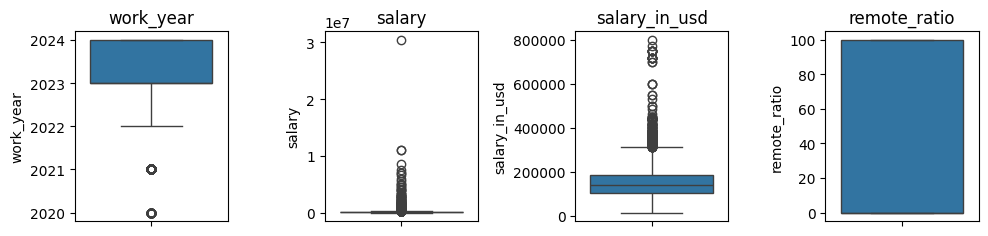

In [35]:
# Membuat Fungsi Boxplot
def boxplot_for_all_columns(df):

    # Filter hanya kolom numerik
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns
    
    # Mengatur ukuran plot
    plt.figure(figsize=(20, 15))

    # Loop melalui setiap kolom numerik dan membuat box plot
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(7, 8, i)
        sns.boxplot(y=df[column])
        plt.title(column)

    plt.tight_layout()
    plt.show()

# Contoh pemanggilan fungsi
boxplot_for_all_columns(df)

In [36]:
# Menampilkan Histogram Boxplot
histogram_boxplot(df, "salary_in_usd", "Salary in USD")

Loading BokehJS ...

In [37]:
# Melihat Informasi Statistika
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [38]:
# Fungsi untuk menghitung mean, median, mode dan mengevaluasi distribusi
def evaluate_distribution(col):
    mean = col.mean()
    median = col.median()
    mode = col.mode()[0]  # Ambil mode pertama jika ada beberapa mode
    if (abs(mean - median) / mean <= 0.05 and abs(mean - mode) / mean <= 0.05):
        evaluasi = 'Distribusi Normal'
    elif mean > median:
        evaluasi = 'Skewness Positif'
    else:
        evaluasi = 'Skewness Negatif'
    return pd.Series({'Mean': mean, 'Median': median, 'Mode': mode, 'Evaluasi': evaluasi})

# Memilih hanya kolom numerik
numerical_cols = df.select_dtypes(include=[np.number])

# Terapkan fungsi ke setiap kolom numerik dalam DataFrame
result = numerical_cols.apply(evaluate_distribution)
result

,work_year,salary,salary_in_usd,remote_ratio
Mean,2023.1389,165022.718965,149874.718763,32.76048
Median,2023.0,142200.0,141300.0,0.0
Mode,2023,150000,150000,0
Evaluasi,Distribusi Normal,Skewness Positif,Skewness Positif,Skewness Positif


***Insight :***

Pada sesi ini, akan ditampilkan outlier untuk setiap kolom numerik. Terdapat beberapa kolom yang memiliki outlier, yaitu:

- `work_year`

- `salary`

- `salary_in_usd`

Kolom `salary_in_usd` akan digunakan sebagai nilai target atau nilai y. Oleh karena itu, kolom ini akan dijadikan acuan untuk mengurangi nilai outliernya. Visualisasi histogram telah dilakukan pada kolom `salary_in_usd`. Dari gambar tersebut, terlihat bahwa data cenderung miring ke arah kanan, yang menandakan bahwa kolom ini memiliki skewness positif. Hal ini dibuktikan dengan nilai rata-rata yang lebih tinggi dibandingkan nilai median.

---

#### ***Outlier Handling***

---

##### **Memisahkan Data Kategorik dan Numerik**

---

In [39]:
#Melakukan Seleksi Data Kategorik
df_kategorik = df.select_dtypes(include=['object', 'bool'])

# Melakukan Seleksi Data Numerik
df_numerik = df.select_dtypes(exclude=['object', 'bool'])

***Insight :***

Untuk menangani outlier, langkah pertama yang akan dilakukan adalah memisahkan data kategorikal dan data numerik. Data numerik akan diproses lebih lanjut untuk menangani outlier. Proses ini penting untuk memastikan bahwa analisis data tidak terganggu oleh nilai-nilai ekstrem yang dapat mempengaruhi hasil. Dengan memisahkan kedua jenis data tersebut, kita dapat menerapkan metode penanganan yang tepat untuk masing-masing jenis data. Pada data numerik, penanganan outlier akan dilakukan menggunakan teknik yang sesuai, seperti transformasi data, pemangkasan (*trimming*), atau imputasi. Langkah-langkah ini akan membantu meningkatkan kualitas data dan akurasi model analisis yang akan diterapkan.

---

##### **Menampilkan Persentase Outlier**

---

In [40]:
# Fungsi Pengecekan Skewness Data
def cek_skewness(data):
    skewness_data = pd.DataFrame({'Skewness': data.skew()})
    return skewness_data

In [41]:
# Melihat Skewness 
df_skew = cek_skewness(df_numerik)

In [42]:
# Fungsi Menghitung Persentase Outlier
def calculate_outlier_percentage(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outlier_percentage = (len(outliers) / len(data)) * 100
    return "{:.2f}%".format(outlier_percentage)

# Fungsi Melihat Hasil Outlier di Setiap Kolom (Data Dictionary)
def calculate_outlier_percentage_all_columns(data):
    outlier_percentage_dict = {}
    for column in data.columns:
        outlier_percentage = calculate_outlier_percentage(data[column])
        outlier_percentage_dict[column] = outlier_percentage
    return outlier_percentage_dict

In [43]:
# Menampilkan Persentase Outlier
df_persentase = calculate_outlier_percentage_all_columns(df_numerik)

# Membuat DataFrame dari Hasil Perhitungan
numerik_df = pd.DataFrame.from_dict(df_persentase, orient='index', columns=['Outlier_Percentage_Before'])
numerik_skew = df_skew.rename(columns={'Skewness': 'Skewness_Before'})

# Menggabungkan Kedua DataFrame
merged_df = pd.concat([numerik_df, numerik_skew], axis=1)

# Menampilkan DataFrame Hasil Penggabungan
merged_df

,Outlier_Percentage_Before,Skewness_Before
work_year,1.97%,-0.807535
salary,2.20%,50.014242
salary_in_usd,1.82%,1.522785
remote_ratio,0.00%,0.734600


In [44]:
# Cek Winsorizer
def winsoriser(df):
    # Inisialisasi Winsorizer 
    winsorizer = Winsorizer(
        capping_method='iqr',
        tail='both',
        fold=1.5
    )
    winsorizer2 = Winsorizer(
        capping_method='iqr',
        tail='both',
        fold=3
    )
    for column in df.columns:
        # Melakukan Censoring 
        if (abs(df[column].skew())  <= 1) & (abs(df[column].skew()) >= 0.5):
            df[column] = winsorizer.fit_transform(df[[column]])
        else:
            df[column] = winsorizer2.fit_transform(df[[column]])
    return df

In [45]:
# Winsorizer Data
df_numerik = winsoriser(df_numerik)

In [46]:
# Melihat Skewness 
df_skew_new = cek_skewness(df_numerik)

In [47]:
# Menampilkan Persentase Outlier
df_persentase_winsorizer = calculate_outlier_percentage_all_columns(df_numerik)

# Membuat DataFrame dari Hasil Perhitungan
numerik_df_winsorizer = pd.DataFrame.from_dict(df_persentase_winsorizer, orient='index', columns=['Outlier_Percentage_After'])
numerik_skew_winsorizer = df_skew_new.rename(columns={'Skewness': 'Skewness_After'})

# Menggabungkan Kedua DataFrame
merged_df1 = pd.concat([numerik_df, numerik_skew, numerik_df_winsorizer, numerik_skew_winsorizer], axis=1)

# Menampilkan DataFrame Hasil Penggabungan
merged_df1

,Outlier_Percentage_Before,Skewness_Before,Outlier_Percentage_After,Skewness_After
work_year,1.97%,-0.807535,0.00%,-0.300619
salary,2.20%,50.014242,2.20%,1.014835
salary_in_usd,1.82%,1.522785,1.82%,0.828662
remote_ratio,0.00%,0.734600,0.00%,0.734600


In [48]:
# Menggabungkan Nilai Kategorik dengan Numerik
df = pd.concat([df_numerik, df_kategorik], axis=1)

***Insight :***

Data numerik menunjukkan adanya beberapa nilai outlier dalam kolom gaji (`Salary`). Skewness mencapai 50, yang menunjukkan ketidaksimetrisan yang ekstrem dalam distribusi gaji tersebut. Ketidaksimetrisan semacam itu sering kali terjadi karena variasi besar dalam nilai gaji. Untuk menangani masalah ini, dilakukan metode *capping*. Hasilnya, skewness berhasil dikurangi menjadi -0.5 sampai -1 atau 0.5 sampai 1, yang menunjukkan bahwa data telah mendekati distribusi normal.

---

### **Statistika Inferensial**

---

#### **Korelasi Tahun dengan Gaji**

---

Untuk menguji apakah terdapat pengaruh hubungan antara tahun dengan gaji, hipotesis berikut akan diuji:

- H0: Tidak terdapat korelasi antara tahun dengan pertumbuhan gaji.

- H1: Terdapat korelasi antara tahun dengan pertumbuhan gaji.

---

In [49]:
# # Menghitung rata-rata gaji untuk setiap tahun
avg_salaries_year = df.groupby('work_year')['salary_in_usd'].mean().reset_index()

scatter_plot_regression(avg_salaries_year, x_col='work_year', y_col='salary_in_usd', x_label='Tahun', y_label='Gaji Rata-rata (USD)', title='Korelasi Tahun dengan Gaji')

Loading BokehJS ...

In [50]:
# Menampilkan Informasi Analisis Korelasi
corr_rho, pval_s = stats.pearsonr(df['work_year'], df['salary_in_usd'])
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s }")

rho-correlation: 0.08, p-value: 9.745759926855788e-22


***Insight :***

Berdasarkan hasil pengujian korelasi antara tahun dengan gaji, didapatkan nilai rho-korelasi sebesar 0.08 dan nilai p sebesar 9.745759926855788e-22. Berikut adalah penjelasannya:

- Nilai rho-korelasi (0.08): Nilai ini menunjukkan tingkat kekuatan dan arah hubungan linier antara dua variabel. Dalam hal ini, rho-korelasi sebesar 0.08 menunjukkan korelasi yang sangat lemah dan positif antara tahun dan gaji. Artinya, meskipun ada sedikit peningkatan gaji seiring berjalannya waktu, hubungan tersebut sangat lemah.

- Nilai p (9.745759926855788e-22): Nilai p yang sangat kecil ini menunjukkan bahwa hasil pengujian statistik sangat signifikan. Dalam konteks hipotesis yang diajukan, nilai p yang sangat kecil ini memungkinkan kita untuk menolak hipotesis nol (H0) yang menyatakan tidak terdapat korelasi antara tahun dengan pertumbuhan gaji.

Meskipun hasilnya signifikan secara statistik, kekuatan korelasi yang sangat lemah (rho = 0.08) menunjukkan bahwa tahun hanya memiliki sedikit pengaruh terhadap pertumbuhan gaji. Dari gambar dapat dilihat bahwa terjadi peningkatan gaji untuk setiap tahunnya. Namun, pada tahun 2024 terjadi penurunan. Hal ini bukan disebabkan oleh masalah tertentu, melainkan karena ketika data ini diambil, masih berada di tahun 2024 sehingga data yang diperoleh belum lengkap. Dalam kondisi aktual, meskipun gaji mengalami kenaikan, peningkatannya tidak terlalu besar atau konsisten. Hal ini disebabkan oleh fluktuasi ekonomi, perubahan permintaan tenaga kerja, atau faktor-faktor lain yang tidak terduga seperti wabah.

---

#### **Korelasi Pengalaman Kerja dengan Gaji**

---

Untuk menguji apakah terdapat pengaruh hubungan pengalaman kerja dengan gaji, hipotesis berikut akan diuji:

- H0: Tidak terdapat korelasi antara pengalaman kerja dengan pertumbuhan gaji.

- H1: Terdapat korelasi antara pengalaman kerja dengan pertumbuhan gaji.

---

In [51]:
# # Menghitung rata-rata gaji untuk setiap tahun
avg_salaries_experience = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
plot_bar_2_column(avg_salaries_experience, 'experience_level', 'salary_in_usd', title="Korelasi Pengalaman Kerja dengan Gaji", x_label="Pengalaman Kerja", y_label="Gaji")

Loading BokehJS ...

In [52]:
# Menampilkan Bentuk Korelasi
corr_tau, pval_k = stats.kendalltau(df['experience_level'], df['salary_in_usd'])
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

tau-correlation: 0.26, p-value: 0.0


***Insight :***

Hasil pengujian menunjukkan nilai tau-korelasi sebesar 0.26 dan nilai p sebesar 0.0. Berikut adalah penjelasannya:

- Nilai tau-korelasi (0.26): Nilai ini menunjukkan tingkat kekuatan dan arah hubungan antara dua variabel ordinal (seperti pengalaman kerja dan gaji). Dalam hal ini, nilai tau-korelasi sebesar 0.26 menunjukkan korelasi yang moderat antara pengalaman kerja dan gaji. Artinya, terdapat hubungan yang signifikan antara pengalaman kerja dengan pertumbuhan gaji, meskipun kekuatannya tidak sangat kuat.

- Nilai p (0.0): Nilai p yang sangat kecil menunjukkan bahwa hasil pengujian statistik ini sangat signifikan secara statistik. Dalam konteks hipotesis yang diajukan, nilai p yang sangat kecil ini memungkinkan kita untuk menolak hipotesis nol (H0) yang menyatakan tidak terdapat korelasi antara pengalaman kerja dengan pertumbuhan gaji.

Berdasarkan hasil ini, kita dapat menyimpulkan bahwa terdapat hubungan yang moderat antara pengalaman kerja dan pertumbuhan gaji dalam industri ini. Dengan demikian, pengalaman kerja dapat menjadi faktor yang berpengaruh dalam menentukan tingkat gaji seseorang di bidang ini. Berikut adalah beberapa penjelasan yang mungkin terkait dengan temuan ini:

- Nilai Peningkatan Gaji seiring dengan Pengalaman Kerja: Adanya korelasi positif antara pengalaman kerja dan gaji menunjukkan bahwa semakin lama seseorang bekerja di industri data, semakin tinggi kemungkinan mereka mendapatkan gaji yang lebih tinggi. Ini bisa terjadi karena pengalaman kerja biasanya dihubungkan dengan tingkat keahlian dan kontribusi yang lebih besar terhadap perusahaan, yang pada akhirnya dapat menghasilkan pengakuan dan kompensasi yang lebih tinggi.

- Penilaian Terhadap Keterampilan dan Kontribusi: Perusahaan mungkin cenderung memberikan kompensasi yang lebih tinggi kepada karyawan yang memiliki pengalaman kerja yang lebih lama karena mereka dianggap memiliki keterampilan dan pengetahuan yang lebih mendalam dalam analisis data, penggunaan alat-alat analisis, dan pemecahan masalah yang kompleks. Pengalaman juga dapat dianggap sebagai indikator potensi bagi karyawan untuk memberikan dampak yang lebih besar pada kesuksesan perusahaan.

- Pasar Kerja yang Bersaing: Dalam industri yang kompetitif seperti `Data Science`, permintaan akan profesional yang berpengalaman terus meningkat. Karyawan yang memiliki pengalaman kerja yang solid dalam berbagai proyek dan teknologi mungkin lebih diminati oleh perusahaan-perusahaan yang mencari keunggulan kompetitif dalam analisis data dan pengambilan keputusan berbasis data.

---

#### **Hubungan Lokasi Pekerjaan dengan Gaji**

---

Untuk menguji apakah terdapat pengaruh hubungan pengalaman kerja dengan gaji, hipotesis berikut akan diuji:

- H0: Tidak terdapat korelasi antara hubungan lokasi pekerjaan dengan pertumbuhan gaji.

- H1: Terdapat korelasi antara hubungan lokasi pekerjaan dengan pertumbuhan gaji.

---

In [53]:
# Misalkan df adalah DataFrame Anda
# Menghitung rata-rata gaji untuk setiap lokasi perusahaan
avg_salaries = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Mengurutkan data berdasarkan nilai rata-rata gaji
avg_salaries_sorted = avg_salaries.sort_values(by='salary_in_usd', ascending=False)

# Memilih 5 baris terbesar
top_5_salaries = avg_salaries_sorted.head(5).reset_index(drop=True)

# Menghapus baris lainnya (menghapus semua kolom kecuali 5 terbesar)
# Dalam konteks ini, kita hanya menyimpan top_5_salaries
top_5_salaries

,company_location,salary_in_usd
0,QA,300000.000000
1,IL,217332.000000
2,PR,167500.000000
3,US,156919.428979
4,NZ,147681.666667


In [54]:
plot_bar_2_column(top_5_salaries, 'company_location', 'salary_in_usd', title="Korelasi Lokasi Pekerjaan dengan Gaji", x_label="Lokasi Pekerjaan", y_label="Gaji")

Loading BokehJS ...

In [55]:
# Menampilkan Bentuk Korelasi
corr_tau, pval_k = stats.kendalltau(df['company_location'], df['salary_in_usd'])
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

tau-correlation: 0.24, p-value: 1.8575035385864825e-298


***Insight :***

Hasil pengujian menunjukkan nilai tau-korelasi sebesar 0.24 dan nilai p sebesar 1.8575035385864825e-298. Berikut adalah penjelasannya:

- Nilai tau-korelasi (0.24): Nilai ini menunjukkan tingkat kekuatan dan arah hubungan antara dua variabel ordinal (seperti lokasi pekerjaan dan gaji). Dalam hal ini, nilai tau-korelasi sebesar 0.24 menunjukkan korelasi yang moderat antara lokasi pekerjaan dan gaji. Artinya, terdapat hubungan yang signifikan antara lokasi pekerjaan dengan pertumbuhan gaji.

- Nilai p (1.8575035385864825e-298): Nilai p yang sangat kecil menunjukkan bahwa hasil pengujian statistik sangat signifikan secara statistik. Dalam konteks hipotesis yang diajukan, nilai p yang sangat kecil ini memungkinkan kita untuk menolak hipotesis nol (H0) yang menyatakan tidak terdapat korelasi antara lokasi pekerjaan dengan pertumbuhan gaji.

Berdasarkan hasil ini, kita dapat menyimpulkan bahwa terdapat hubungan yang moderat antara lokasi pekerjaan dan pertumbuhan gaji dalam industri ini. Dengan demikian, lokasi pekerjaan dapat menjadi faktor yang berpengaruh dalam menentukan tingkat gaji seseorang di bidang ini. Berikut beberapa penjelasan terkait fenomena ini:

- Perbedaan Tingkat Hidup: Lokasi pekerjaan dapat memengaruhi tingkat penghasilan seseorang karena perbedaan biaya hidup antar daerah. Misalnya, pekerja di daerah dengan biaya hidup yang tinggi cenderung menerima gaji yang lebih tinggi untuk mencukupi kebutuhan sehari-hari yang lebih mahal.

- Pasar Kerja Lokal: Kondisi pasar kerja lokal juga memainkan peran penting. Di daerah dengan permintaan yang tinggi terhadap tenaga kerja di bidang Data Science, gaji cenderung lebih tinggi karena persaingan untuk menarik dan mempertahankan bakat yang berkualitas.

- Pengaruh Industri dan Ekosistem Bisnis: Lokasi pekerjaan juga dapat memengaruhi tingkat gaji melalui kehadiran industri dan ekosistem bisnis yang berkembang. Misalnya, daerah yang memiliki banyak perusahaan teknologi atau startup cenderung menawarkan gaji yang lebih kompetitif karena adanya persaingan yang ketat untuk bakat terbaik.

- Ketersediaan Bakat Lokal: Faktor lain yang memengaruhi korelasi antara lokasi pekerjaan dan gaji adalah ketersediaan bakat lokal. Di daerah dengan pasokan bakat yang terbatas, perusahaan mungkin cenderung menawarkan gaji yang lebih tinggi untuk menarik karyawan yang berkualitas.
    

#### **Korelasi Ukuran Perusahaan dengan Gaji**

---

Untuk menguji apakah terdapat pengaruh hubungan pengalaman kerja dengan gaji, hipotesis berikut akan diuji:

- H0: Tidak terdapat korelasi antara ukuran perusahaan dengan pertumbuhan gaji.

- H1: Terdapat korelasi antara ukuran perusahaan dengan pertumbuhan gaji.

---

In [56]:
# Menghitung rata-rata gaji untuk setiap tahun
avg_salaries_size = df.groupby('company_size')['salary_in_usd'].mean().reset_index()
plot_bar_2_column(avg_salaries_size, 'company_size', 'salary_in_usd', title="Korelasi Ukuran Perusahaan dengan Gaji", x_label="Ukuran Perusahaan", y_label="Gaji")

Loading BokehJS ...

In [57]:
# Menampilkan Bentuk Korelasi
corr_tau, pval_k = stats.kendalltau(df['company_size'], df['salary_in_usd'])
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

tau-correlation: -0.00, p-value: 0.5407196676566941


***Insight :***

Hasil pengujian menunjukkan nilai tau-korelasi sebesar -0.00 dan nilai p sebesar 0.5407196676566941. Berikut adalah penjelasannya:

- Nilai tau-korelasi (-0.00): Nilai ini menunjukkan tingkat kekuatan dan arah hubungan antara dua variabel ordinal (seperti ukuran perusahaan dan gaji). Dalam hal ini, nilai tau-korelasi yang sangat mendekati nol menunjukkan bahwa tidak ada korelasi yang signifikan antara ukuran perusahaan dengan pertumbuhan gaji. Nilai negatif menunjukkan bahwa tidak ada hubungan linier antara variabel-variabel tersebut.

- Nilai p (0.5407196676566941): Nilai p yang cukup besar menunjukkan bahwa hasil pengujian statistik tidak signifikan secara statistik. Dalam konteks hipotesis yang diajukan, nilai p yang besar ini menunjukkan bahwa tidak ada cukup bukti untuk menolak hipotesis nol (H0) yang menyatakan tidak terdapat korelasi antara ukuran perusahaan dengan pertumbuhan gaji.

Berdasarkan hasil ini, kita tidak dapat menyimpulkan adanya hubungan antara ukuran perusahaan dengan pertumbuhan gaji dalam industri ini. Meskipun ukuran perusahaan mungkin memainkan peran dalam menentukan tingkat gaji di beberapa konteks, temuan ini menunjukkan bahwa dalam konteks ya Berikut beberapa penjelasan terkait fenomena ini:

- Fleksibilitas Gaji: Industri Data Science seringkali menawarkan fleksibilitas dalam hal kompensasi, terutama terkait dengan ukuran perusahaan. Meskipun perusahaan besar mungkin memiliki sumber daya yang lebih besar untuk menawarkan gaji yang tinggi, perusahaan kecil atau startup mungkin menawarkan kompensasi yang kompetitif dalam bentuk opsi saham atau peluang pertumbuhan karir yang lebih cepat.

- Kebutuhan akan Bakat Berkualitas: Industri Data Science seringkali didorong oleh inovasi dan kebutuhan akan bakat berkualitas. Karena itu, perusahaan, baik besar maupun kecil, mungkin bersaing untuk menarik dan mempertahankan bakat terbaik dengan menawarkan paket kompensasi yang menarik, terlepas dari ukuran perusahaan tersebut.

- Pengaruh Faktor-Faktor Lain: Selain ukuran perusahaan, terdapat banyak faktor lain yang dapat memengaruhi tingkat gaji seseorang di bidang Data Science, seperti tingkat pengalaman, lokasi geografis, spesialisasi keterampilan, dan kondisi pasar kerja lokal. Oleh karena itu, pengaruh ukuran perusahaan terhadap pertumbuhan gaji mungkin diimbangi oleh faktor-faktor lain yang lebih signifikan dalam menentukan kompensasi karyawan.

- Tren Industri: Tren industri dan ekonomi secara keseluruhan juga dapat memengaruhi hubungan antara ukuran perusahaan dan pertumbuhan gaji. Misalnya, dalam periode di mana startup mengalami pertumbuhan pesat, kompensasi yang ditawarkan oleh perusahaan kecil mungkin lebih kompetitif dibandingkan dengan perusahaan besar yang mungkin memiliki pembatasan anggaran atau struktur kompensasi yang lebih kaku.

---

## ***Kesimpulan*** 

---

Dengan menganalisis data, dapat disimpulkan bahwa:

- Ada korelasi moderat antara pengalaman kerja dan gaji dalam industri Data Science. Semakin tinggi tingkat pengalaman, semakin besar kemungkinan mendapatkan gaji yang lebih tinggi.

- Lokasi pekerjaan memainkan peran penting dalam menentukan gaji, dengan perbedaan gaji yang tercermin dari faktor-faktor seperti biaya hidup, persaingan pasar kerja lokal, dan kondisi ekonomi regional.

- Tidak ada bukti signifikan yang menunjukkan bahwa ukuran perusahaan secara langsung memengaruhi pertumbuhan gaji dalam industri Data Science, menyoroti pentingnya faktor-faktor lain seperti fleksibilitas kompensasi, kebutuhan akan bakat berkualitas, dan dinamika pasar kerja.

- Untuk menjawab pertanyaan 5W + 1 H:

Metode | Analisis
---|---
Who | Ahli data atau analis data yang terampil menjadi sumber daya utama untuk memberikan wawasan dan pemahaman tentang tren gaji dalam dunia Data Science. Mereka memiliki kemampuan untuk mengumpulkan, menganalisis, dan memahami data gaji dari berbagai sumber, serta kemampuan untuk menerapkan teknik analisis statistik yang diperlukan.
What | Ya, terdapat perbedaan dalam persepsi nilai antara profesional dengan tingkat pengalaman yang berbeda dalam industri Data Science. Profesional dengan tingkat pengalaman yang lebih tinggi cenderung memiliki nilai gaji yang lebih tinggi dibandingkan dengan profesional pemula atau dengan tingkat pengalaman yang lebih rendah. Ini disebabkan oleh akumulasi pengalaman, keterampilan yang lebih mendalam, serta kontribusi yang lebih besar terhadap perusahaan seiring berjalannya waktu.
Where | Lokasi geografis tempat seseorang bekerja mempengaruhi tingkat gaji dalam dunia Data Science. Daerah dengan biaya hidup yang tinggi, seperti kota-kota besar atau pusat teknologi, cenderung menawarkan gaji yang lebih tinggi untuk mengkompensasi biaya hidup yang lebih tinggi. Selain itu, perbedaan dalam kondisi pasar kerja lokal dan ekosistem bisnis juga memengaruhi tingkat gaji di berbagai wilayah.
When | Perubahan signifikan dalam tren data gaji dapat terjadi pada berbagai titik waktu, tergantung pada faktor-faktor eksternal dan internal yang memengaruhi pasar kerja. Ini bisa terjadi sebagai respons terhadap perubahan ekonomi global, perubahan kebijakan perusahaan, atau tren industri yang baru muncul. Analisis data secara teratur diperlukan untuk mengidentifikasi dan memahami perubahan-perubahan ini.
Why | Perusahaan menggunakan wawasan dari data gaji ini dalam proses perekrutan karyawan untuk beberapa alasan. Pertama, data gaji membantu perusahaan menetapkan standar kompensasi yang adil dan kompetitif untuk menarik dan mempertahankan bakat terbaik. Selain itu, analisis data gaji juga dapat memberikan wawasan tentang tren pasar kerja, permintaan untuk keterampilan tertentu, dan nilai tambah dari karyawan dengan pengalaman atau keterampilan khusus.
How | Penggunaan teknik analisis statistik membantu dalam memahami pola atau tren dalam data gaji dengan mengidentifikasi hubungan, pola, atau anomali yang mungkin terjadi. Teknik-teknik seperti korelasi, regresi, dan analisis varians dapat digunakan untuk mengeksplorasi hubungan antara variabel-variabel yang berbeda dalam data gaji, sementara visualisasi data memungkinkan representasi grafis yang jelas dari pola atau tren yang teridentifikasi.